## From Landmarks to Animations

Víctor Ubieto | 2022

victoremilio.ubieto@upf.edu // victor.ubieto@e-campus.uab.cat

In [1]:
import os
import json
import math
import graphviz
import tensorflowjs as tfjs
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.models import load_model
from sklearn.model_selection import train_test_split

Let us first read the train and test files

In [2]:
train_data_dir = "E:\Documents\Projects\Python\PycharmCurrent\Dataset"
train_data_dir_gt = "E:\Documents\Projects\Python\PycharmCurrent\Dataset\gt"
data = []
gt_data = []

os.chdir(train_data_dir)
for file in os.listdir():
    if file.endswith(".json"):
        with open(file, 'r') as f:
            d = json.load(f)  # returns JSON object as a dictionary
            input_data = d
            data = data + d

os.chdir(train_data_dir_gt)
for file in os.listdir():
    with open(file, 'r') as f:
        d = json.load(f)
        gt_data = gt_data + d

print(len(data)) # check data is something
print(len(gt_data)) # check data is something
os.chdir("E:\Documents\Projects\Python\PycharmCurrent")

5127
5127


Hyperparameters definition

In [55]:
n_epochs = 2500
batch_size = 40
init_lr = 0.001
decay_stp = 10000
decay_rt = 0.92

#def step_decay(epoch):
#   initial_lrate = 0.001
#   drop = 0.5
#   epochs_drop = 50.0
#   lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
#   return lrate
#lr_scheduler = LearningRateScheduler(step_decay)

lr_rate = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=init_lr,
    decay_steps=decay_stp,
    decay_rate=decay_rt)

#optimizer = optimizers.Adam(learning_rate=lr_rate)
optimizer = optimizers.Adamax(learning_rate=lr_rate)

#callbacks_list = [lr_scheduler]

Data preparation + data preprocessing, normalization?

Divide data in train-val-test

In [56]:
X_train, x_test, Y_train, y_test = train_test_split(data, gt_data, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25)  # 0.25 x 0.8 = 0.2
x_length = len(x_train[0])
y_length = len(y_train[0])

Model creation (https://www.tensorflow.org/tutorials/keras/regression)

In [57]:
model = Sequential()
model.add(layers.LayerNormalization(input_dim=x_length))
model.add(layers.Dense(256, activation="relu", name="layer1"))
model.add(layers.Dense(512, activation='relu', name="layer2"))
model.add(layers.Dense(1024, activation='relu', name="layer3"))
model.add(layers.Dense(2048, activation='relu', name="layer4"))
model.add(layers.Dense(1024, activation='relu', name="layer5"))
model.add(layers.Dense(512, activation='relu', name="layer6"))
model.add(layers.Dense(y_length, activation='linear', name="layer_out"))

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model.summary()
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_10 (Lay  (None, 134)              268       
 erNormalization)                                                
                                                                 
 layer1 (Dense)              (None, 256)               34560     
                                                                 
 layer2 (Dense)              (None, 512)               131584    
                                                                 
 layer3 (Dense)              (None, 1024)              525312    
                                                                 
 layer4 (Dense)              (None, 2048)              2099200   
                                                                 
 layer5 (Dense)              (None, 1024)              2098176   
                                                     

Training step

In [58]:
history = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=n_epochs,
                validation_data=(x_val, y_val),
                #callbacks=callbacks_list
                )

Epoch 1/2500
77/77 [==============================] - 2s 23ms/step - loss: 0.0208 - accuracy: 0.0950 - val_loss: 0.0115 - val_accuracy: 0.0799
Epoch 2/2500
77/77 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.1011 - val_loss: 0.0100 - val_accuracy: 0.1053
Epoch 3/2500
77/77 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.1122 - val_loss: 0.0076 - val_accuracy: 0.1033
Epoch 4/2500
77/77 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.1249 - val_loss: 0.0066 - val_accuracy: 0.1179
Epoch 5/2500
77/77 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 0.1106 - val_loss: 0.0057 - val_accuracy: 0.0867
Epoch 6/2500
77/77 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 0.1086 - val_loss: 0.0049 - val_accuracy: 0.0926
Epoch 7/2500
77/77 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 0.1047 - val_loss: 0.0045 - val_accuracy: 0.0712
Epoch

77/77 [==============================] - 0s 6ms/step - loss: 5.0615e-04 - accuracy: 0.1268 - val_loss: 8.4569e-04 - val_accuracy: 0.1257
Epoch 58/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.4368e-04 - accuracy: 0.1236 - val_loss: 8.3982e-04 - val_accuracy: 0.1433
Epoch 59/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.0265e-04 - accuracy: 0.1272 - val_loss: 8.1594e-04 - val_accuracy: 0.1345
Epoch 60/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.0134e-04 - accuracy: 0.1249 - val_loss: 7.4026e-04 - val_accuracy: 0.1111
Epoch 61/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.0109e-04 - accuracy: 0.1294 - val_loss: 7.4334e-04 - val_accuracy: 0.1491
Epoch 62/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.2487e-04 - accuracy: 0.1275 - val_loss: 8.4651e-04 - val_accuracy: 0.1520
Epoch 63/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.8449e-04 - accuracy: 0.1275 - v

77/77 [==============================] - 0s 6ms/step - loss: 1.6930e-04 - accuracy: 0.1577 - val_loss: 3.8692e-04 - val_accuracy: 0.1832
Epoch 112/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.4881e-04 - accuracy: 0.1525 - val_loss: 4.0043e-04 - val_accuracy: 0.1735
Epoch 113/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.5993e-04 - accuracy: 0.1558 - val_loss: 4.1016e-04 - val_accuracy: 0.1647
Epoch 114/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.9162e-04 - accuracy: 0.1564 - val_loss: 4.6899e-04 - val_accuracy: 0.1520
Epoch 115/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.8857e-04 - accuracy: 0.1450 - val_loss: 4.9114e-04 - val_accuracy: 0.0984
Epoch 116/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.3960e-04 - accuracy: 0.1515 - val_loss: 4.4154e-04 - val_accuracy: 0.1384
Epoch 117/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.6337e-04 - accuracy: 0.14

Epoch 165/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.5177e-05 - accuracy: 0.1964 - val_loss: 2.7556e-04 - val_accuracy: 0.1959
Epoch 166/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.3756e-05 - accuracy: 0.1876 - val_loss: 2.9895e-04 - val_accuracy: 0.1676
Epoch 167/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.4497e-05 - accuracy: 0.1896 - val_loss: 2.9199e-04 - val_accuracy: 0.1988
Epoch 168/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.0282e-04 - accuracy: 0.1779 - val_loss: 2.9510e-04 - val_accuracy: 0.2203
Epoch 169/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.4768e-05 - accuracy: 0.1919 - val_loss: 2.9249e-04 - val_accuracy: 0.1520
Epoch 170/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.7271e-05 - accuracy: 0.1850 - val_loss: 2.7112e-04 - val_accuracy: 0.1823
Epoch 171/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.2696e-05 -

Epoch 219/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.3969e-05 - accuracy: 0.2094 - val_loss: 2.6716e-04 - val_accuracy: 0.1764
Epoch 220/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.3759e-05 - accuracy: 0.1980 - val_loss: 2.7873e-04 - val_accuracy: 0.1433
Epoch 221/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.6477e-05 - accuracy: 0.1977 - val_loss: 2.5203e-04 - val_accuracy: 0.1969
Epoch 222/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.3254e-05 - accuracy: 0.2111 - val_loss: 2.6401e-04 - val_accuracy: 0.1754
Epoch 223/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.0233e-05 - accuracy: 0.2026 - val_loss: 2.6746e-04 - val_accuracy: 0.2008
Epoch 224/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.3077e-04 - accuracy: 0.1776 - val_loss: 3.1389e-04 - val_accuracy: 0.1481
Epoch 225/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.6984e-05 -

Epoch 273/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.1974e-05 - accuracy: 0.2098 - val_loss: 2.3396e-04 - val_accuracy: 0.2232
Epoch 274/2500
77/77 [==============================] - 1s 7ms/step - loss: 3.5775e-05 - accuracy: 0.2124 - val_loss: 2.3025e-04 - val_accuracy: 0.2261
Epoch 275/2500
77/77 [==============================] - 0s 6ms/step - loss: 3.7775e-05 - accuracy: 0.2065 - val_loss: 2.4156e-04 - val_accuracy: 0.1930
Epoch 276/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.6909e-05 - accuracy: 0.2159 - val_loss: 2.3534e-04 - val_accuracy: 0.1998
Epoch 277/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.9413e-05 - accuracy: 0.2075 - val_loss: 3.0391e-04 - val_accuracy: 0.2212
Epoch 278/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.4647e-05 - accuracy: 0.1873 - val_loss: 3.4231e-04 - val_accuracy: 0.2018
Epoch 279/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.0172e-05 -

Epoch 327/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.6157e-05 - accuracy: 0.2293 - val_loss: 2.1759e-04 - val_accuracy: 0.2641
Epoch 328/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.9218e-05 - accuracy: 0.2387 - val_loss: 2.1393e-04 - val_accuracy: 0.1871
Epoch 329/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.0814e-05 - accuracy: 0.2315 - val_loss: 2.1454e-04 - val_accuracy: 0.2066
Epoch 330/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.2434e-05 - accuracy: 0.2325 - val_loss: 2.1855e-04 - val_accuracy: 0.2173
Epoch 331/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.1552e-05 - accuracy: 0.2228 - val_loss: 2.2093e-04 - val_accuracy: 0.2485
Epoch 332/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.2745e-05 - accuracy: 0.2270 - val_loss: 2.1557e-04 - val_accuracy: 0.1988
Epoch 333/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.4777e-05 -

Epoch 381/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.8856e-05 - accuracy: 0.2338 - val_loss: 2.0656e-04 - val_accuracy: 0.2982
Epoch 382/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.3556e-05 - accuracy: 0.2498 - val_loss: 2.0828e-04 - val_accuracy: 0.1969
Epoch 383/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.7656e-05 - accuracy: 0.2465 - val_loss: 2.1271e-04 - val_accuracy: 0.1852
Epoch 384/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.0335e-05 - accuracy: 0.2367 - val_loss: 2.1245e-04 - val_accuracy: 0.2164
Epoch 385/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.2374e-05 - accuracy: 0.2302 - val_loss: 2.1540e-04 - val_accuracy: 0.2290
Epoch 386/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.2030e-05 - accuracy: 0.2364 - val_loss: 2.1280e-04 - val_accuracy: 0.2378
Epoch 387/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.4478e-05 -

Epoch 435/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.4865e-05 - accuracy: 0.2400 - val_loss: 2.0972e-04 - val_accuracy: 0.2593
Epoch 436/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.6671e-05 - accuracy: 0.2543 - val_loss: 2.2368e-04 - val_accuracy: 0.1793
Epoch 437/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.0890e-05 - accuracy: 0.2436 - val_loss: 2.0425e-04 - val_accuracy: 0.2329
Epoch 438/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.6738e-05 - accuracy: 0.2520 - val_loss: 2.1431e-04 - val_accuracy: 0.2144
Epoch 439/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.7213e-05 - accuracy: 0.2572 - val_loss: 2.0990e-04 - val_accuracy: 0.3041
Epoch 440/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.7151e-05 - accuracy: 0.2491 - val_loss: 2.0252e-04 - val_accuracy: 0.2105
Epoch 441/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.8582e-05 -

Epoch 489/2500
77/77 [==============================] - 1s 9ms/step - loss: 3.3703e-05 - accuracy: 0.2410 - val_loss: 3.6640e-04 - val_accuracy: 0.2534
Epoch 490/2500
77/77 [==============================] - 1s 9ms/step - loss: 6.2370e-05 - accuracy: 0.2052 - val_loss: 2.1731e-04 - val_accuracy: 0.2232
Epoch 491/2500
77/77 [==============================] - 1s 9ms/step - loss: 3.9609e-05 - accuracy: 0.2263 - val_loss: 2.1330e-04 - val_accuracy: 0.2661
Epoch 492/2500
77/77 [==============================] - 1s 9ms/step - loss: 1.5933e-05 - accuracy: 0.2407 - val_loss: 1.9761e-04 - val_accuracy: 0.2339
Epoch 493/2500
77/77 [==============================] - 1s 10ms/step - loss: 8.6509e-06 - accuracy: 0.2719 - val_loss: 1.9989e-04 - val_accuracy: 0.2583
Epoch 494/2500
77/77 [==============================] - 1s 9ms/step - loss: 8.4960e-06 - accuracy: 0.2644 - val_loss: 1.9511e-04 - val_accuracy: 0.2583
Epoch 495/2500
77/77 [==============================] - 1s 10ms/step - loss: 7.3709e-06

77/77 [==============================] - 1s 10ms/step - loss: 1.1020e-05 - accuracy: 0.2595 - val_loss: 2.0602e-04 - val_accuracy: 0.2515
Epoch 543/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.5448e-05 - accuracy: 0.2517 - val_loss: 2.1785e-04 - val_accuracy: 0.2086
Epoch 544/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.9259e-05 - accuracy: 0.2543 - val_loss: 2.0588e-04 - val_accuracy: 0.2300
Epoch 545/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.5036e-05 - accuracy: 0.2524 - val_loss: 2.1489e-04 - val_accuracy: 0.2788
Epoch 546/2500
77/77 [==============================] - 1s 9ms/step - loss: 2.2656e-05 - accuracy: 0.2618 - val_loss: 2.5419e-04 - val_accuracy: 0.2164
Epoch 547/2500
77/77 [==============================] - 1s 10ms/step - loss: 2.7028e-05 - accuracy: 0.2345 - val_loss: 2.0684e-04 - val_accuracy: 0.2505
Epoch 548/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.3598e-05 - accuracy

Epoch 596/2500
77/77 [==============================] - 1s 11ms/step - loss: 9.8503e-06 - accuracy: 0.2849 - val_loss: 1.9820e-04 - val_accuracy: 0.3012
Epoch 597/2500
77/77 [==============================] - 1s 11ms/step - loss: 9.6314e-06 - accuracy: 0.2689 - val_loss: 1.9850e-04 - val_accuracy: 0.2466
Epoch 598/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.1141e-05 - accuracy: 0.2706 - val_loss: 2.0434e-04 - val_accuracy: 0.1998
Epoch 599/2500
77/77 [==============================] - 1s 10ms/step - loss: 1.4902e-05 - accuracy: 0.2550 - val_loss: 2.0721e-04 - val_accuracy: 0.2437
Epoch 600/2500
77/77 [==============================] - 1s 10ms/step - loss: 1.4615e-05 - accuracy: 0.2715 - val_loss: 2.0756e-04 - val_accuracy: 0.2827
Epoch 601/2500
77/77 [==============================] - 1s 11ms/step - loss: 2.5616e-05 - accuracy: 0.2390 - val_loss: 2.1445e-04 - val_accuracy: 0.2144
Epoch 602/2500
77/77 [==============================] - 1s 9ms/step - loss: 1.3235

77/77 [==============================] - 1s 11ms/step - loss: 1.0368e-05 - accuracy: 0.2771 - val_loss: 1.9611e-04 - val_accuracy: 0.2563
Epoch 650/2500
77/77 [==============================] - 1s 9ms/step - loss: 5.9003e-06 - accuracy: 0.2989 - val_loss: 1.9699e-04 - val_accuracy: 0.2797
Epoch 651/2500
77/77 [==============================] - 1s 11ms/step - loss: 5.8573e-06 - accuracy: 0.2917 - val_loss: 1.9619e-04 - val_accuracy: 0.2281
Epoch 652/2500
77/77 [==============================] - 1s 11ms/step - loss: 6.3430e-06 - accuracy: 0.2963 - val_loss: 1.9728e-04 - val_accuracy: 0.2524
Epoch 653/2500
77/77 [==============================] - 1s 11ms/step - loss: 5.6513e-06 - accuracy: 0.2995 - val_loss: 1.9488e-04 - val_accuracy: 0.2895
Epoch 654/2500
77/77 [==============================] - 1s 10ms/step - loss: 5.1059e-06 - accuracy: 0.3057 - val_loss: 1.9485e-04 - val_accuracy: 0.2914
Epoch 655/2500
77/77 [==============================] - 1s 9ms/step - loss: 6.2007e-06 - accuracy:

Epoch 703/2500
77/77 [==============================] - 1s 11ms/step - loss: 4.9527e-06 - accuracy: 0.2956 - val_loss: 1.9291e-04 - val_accuracy: 0.3080
Epoch 704/2500
77/77 [==============================] - 1s 9ms/step - loss: 5.2983e-06 - accuracy: 0.2956 - val_loss: 1.9853e-04 - val_accuracy: 0.3051
Epoch 705/2500
77/77 [==============================] - 1s 9ms/step - loss: 1.0080e-05 - accuracy: 0.2836 - val_loss: 2.0362e-04 - val_accuracy: 0.2671
Epoch 706/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.2300e-05 - accuracy: 0.2520 - val_loss: 2.0317e-04 - val_accuracy: 0.2437
Epoch 707/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.3098e-05 - accuracy: 0.2849 - val_loss: 2.0667e-04 - val_accuracy: 0.2563
Epoch 708/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.1364e-05 - accuracy: 0.2764 - val_loss: 1.9729e-04 - val_accuracy: 0.2690
Epoch 709/2500
77/77 [==============================] - 1s 10ms/step - loss: 6.9767e

Epoch 757/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.0402e-05 - accuracy: 0.2722 - val_loss: 1.9937e-04 - val_accuracy: 0.2193
Epoch 758/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.4866e-06 - accuracy: 0.2787 - val_loss: 1.9728e-04 - val_accuracy: 0.3012
Epoch 759/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.5904e-06 - accuracy: 0.2859 - val_loss: 1.9987e-04 - val_accuracy: 0.2593
Epoch 760/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.2506e-06 - accuracy: 0.3031 - val_loss: 2.0255e-04 - val_accuracy: 0.2173
Epoch 761/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.2442e-05 - accuracy: 0.2771 - val_loss: 2.3523e-04 - val_accuracy: 0.2232
Epoch 762/2500
77/77 [==============================] - 0s 6ms/step - loss: 3.1264e-05 - accuracy: 0.2449 - val_loss: 2.5070e-04 - val_accuracy: 0.2329
Epoch 763/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.3382e-05 -

Epoch 811/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.7648e-06 - accuracy: 0.2826 - val_loss: 1.9404e-04 - val_accuracy: 0.2846
Epoch 812/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.6950e-06 - accuracy: 0.3024 - val_loss: 1.9406e-04 - val_accuracy: 0.2739
Epoch 813/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.2987e-06 - accuracy: 0.3190 - val_loss: 1.9513e-04 - val_accuracy: 0.2885
Epoch 814/2500
77/77 [==============================] - 0s 6ms/step - loss: 3.8970e-06 - accuracy: 0.3083 - val_loss: 1.9491e-04 - val_accuracy: 0.2612
Epoch 815/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.0154e-06 - accuracy: 0.3158 - val_loss: 1.9710e-04 - val_accuracy: 0.2651
Epoch 816/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.7827e-05 - accuracy: 0.2777 - val_loss: 2.7986e-04 - val_accuracy: 0.2203
Epoch 817/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.3227e-05 -

Epoch 865/2500
77/77 [==============================] - 1s 6ms/step - loss: 3.4152e-06 - accuracy: 0.3193 - val_loss: 1.9470e-04 - val_accuracy: 0.2671
Epoch 866/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.7810e-06 - accuracy: 0.2953 - val_loss: 1.9728e-04 - val_accuracy: 0.2417
Epoch 867/2500
77/77 [==============================] - 0s 6ms/step - loss: 9.5497e-06 - accuracy: 0.2868 - val_loss: 2.0206e-04 - val_accuracy: 0.2622
Epoch 868/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.6449e-06 - accuracy: 0.3028 - val_loss: 1.9574e-04 - val_accuracy: 0.2417
Epoch 869/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.0534e-06 - accuracy: 0.2849 - val_loss: 2.0617e-04 - val_accuracy: 0.3041
Epoch 870/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.5739e-05 - accuracy: 0.2787 - val_loss: 1.9760e-04 - val_accuracy: 0.2700
Epoch 871/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.1612e-06 -

Epoch 919/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.7468e-06 - accuracy: 0.2767 - val_loss: 1.9505e-04 - val_accuracy: 0.2115
Epoch 920/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.3342e-06 - accuracy: 0.3275 - val_loss: 1.9759e-04 - val_accuracy: 0.2865
Epoch 921/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.4294e-06 - accuracy: 0.3171 - val_loss: 1.9549e-04 - val_accuracy: 0.2856
Epoch 922/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.5790e-06 - accuracy: 0.3223 - val_loss: 1.9453e-04 - val_accuracy: 0.2885
Epoch 923/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.7477e-06 - accuracy: 0.3148 - val_loss: 1.9651e-04 - val_accuracy: 0.2534
Epoch 924/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.5266e-06 - accuracy: 0.3067 - val_loss: 1.9386e-04 - val_accuracy: 0.2846
Epoch 925/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.8541e-06 -

Epoch 973/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.1036e-06 - accuracy: 0.3093 - val_loss: 1.9874e-04 - val_accuracy: 0.3109
Epoch 974/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.6802e-06 - accuracy: 0.3184 - val_loss: 1.9403e-04 - val_accuracy: 0.2778
Epoch 975/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.6755e-06 - accuracy: 0.3125 - val_loss: 2.0012e-04 - val_accuracy: 0.2914
Epoch 976/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.3189e-06 - accuracy: 0.3203 - val_loss: 1.9386e-04 - val_accuracy: 0.2875
Epoch 977/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.3641e-06 - accuracy: 0.2976 - val_loss: 2.1073e-04 - val_accuracy: 0.3060
Epoch 978/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.3903e-05 - accuracy: 0.2784 - val_loss: 2.0857e-04 - val_accuracy: 0.2212
Epoch 979/2500
77/77 [==============================] - 0s 6ms/step - loss: 9.6339e-06 -

Epoch 1027/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.0021e-06 - accuracy: 0.3115 - val_loss: 1.9439e-04 - val_accuracy: 0.2865
Epoch 1028/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.6155e-06 - accuracy: 0.3418 - val_loss: 1.9145e-04 - val_accuracy: 0.2788
Epoch 1029/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.2813e-06 - accuracy: 0.3424 - val_loss: 1.9195e-04 - val_accuracy: 0.2573
Epoch 1030/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.1357e-06 - accuracy: 0.3545 - val_loss: 1.9081e-04 - val_accuracy: 0.3060
Epoch 1031/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.4218e-06 - accuracy: 0.3493 - val_loss: 1.9252e-04 - val_accuracy: 0.2739
Epoch 1032/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.8463e-06 - accuracy: 0.3382 - val_loss: 1.9434e-04 - val_accuracy: 0.2446
Epoch 1033/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.209

77/77 [==============================] - 0s 6ms/step - loss: 5.9293e-06 - accuracy: 0.3125 - val_loss: 1.9971e-04 - val_accuracy: 0.2758
Epoch 1081/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.1866e-06 - accuracy: 0.3223 - val_loss: 1.9488e-04 - val_accuracy: 0.3041
Epoch 1082/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.4602e-06 - accuracy: 0.3021 - val_loss: 1.9887e-04 - val_accuracy: 0.2339
Epoch 1083/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.0473e-06 - accuracy: 0.3236 - val_loss: 1.9449e-04 - val_accuracy: 0.2768
Epoch 1084/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.1425e-06 - accuracy: 0.3502 - val_loss: 1.9573e-04 - val_accuracy: 0.2924
Epoch 1085/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.0757e-06 - accuracy: 0.3522 - val_loss: 1.9334e-04 - val_accuracy: 0.2661
Epoch 1086/2500
77/77 [==============================] - 0s 6ms/step - loss: 3.5584e-06 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 2.9613e-06 - accuracy: 0.3379 - val_loss: 1.9716e-04 - val_accuracy: 0.2495
Epoch 1134/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.9354e-06 - accuracy: 0.3418 - val_loss: 1.9908e-04 - val_accuracy: 0.2817
Epoch 1135/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.4696e-06 - accuracy: 0.3184 - val_loss: 2.0108e-04 - val_accuracy: 0.2446
Epoch 1136/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.2096e-06 - accuracy: 0.2950 - val_loss: 1.9582e-04 - val_accuracy: 0.2622
Epoch 1137/2500
77/77 [==============================] - 0s 6ms/step - loss: 3.6234e-06 - accuracy: 0.3246 - val_loss: 1.9759e-04 - val_accuracy: 0.2710
Epoch 1138/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.9902e-06 - accuracy: 0.3158 - val_loss: 2.0034e-04 - val_accuracy: 0.2554
Epoch 1139/2500
77/77 [==============================] - 0s 6ms/step - loss: 9.2933e-06 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 3.1907e-06 - accuracy: 0.3405 - val_loss: 1.9545e-04 - val_accuracy: 0.3070
Epoch 1187/2500
77/77 [==============================] - 0s 6ms/step - loss: 3.6214e-06 - accuracy: 0.3363 - val_loss: 1.9378e-04 - val_accuracy: 0.2261
Epoch 1188/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.8930e-06 - accuracy: 0.3265 - val_loss: 2.0015e-04 - val_accuracy: 0.2807
Epoch 1189/2500
77/77 [==============================] - 0s 6ms/step - loss: 9.4474e-06 - accuracy: 0.3063 - val_loss: 2.0509e-04 - val_accuracy: 0.2300
Epoch 1190/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.0624e-05 - accuracy: 0.3028 - val_loss: 1.9593e-04 - val_accuracy: 0.3031
Epoch 1191/2500
77/77 [==============================] - 1s 7ms/step - loss: 3.6533e-06 - accuracy: 0.3350 - val_loss: 1.9446e-04 - val_accuracy: 0.3129
Epoch 1192/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.0162e-06 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 4.5788e-06 - accuracy: 0.3242 - val_loss: 1.9878e-04 - val_accuracy: 0.2788
Epoch 1240/2500
77/77 [==============================] - 1s 6ms/step - loss: 9.7532e-06 - accuracy: 0.3207 - val_loss: 1.9868e-04 - val_accuracy: 0.2456
Epoch 1241/2500
77/77 [==============================] - 1s 7ms/step - loss: 4.4202e-06 - accuracy: 0.3174 - val_loss: 1.9339e-04 - val_accuracy: 0.2895
Epoch 1242/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.0084e-06 - accuracy: 0.3554 - val_loss: 1.9357e-04 - val_accuracy: 0.2641
Epoch 1243/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.4566e-06 - accuracy: 0.3727 - val_loss: 1.9209e-04 - val_accuracy: 0.3324
Epoch 1244/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.2814e-06 - accuracy: 0.3763 - val_loss: 1.9270e-04 - val_accuracy: 0.2953
Epoch 1245/2500
77/77 [==============================] - 1s 6ms/step - loss: 1.9689e-06 - accuracy

77/77 [==============================] - 1s 7ms/step - loss: 3.1426e-06 - accuracy: 0.3499 - val_loss: 1.9477e-04 - val_accuracy: 0.2953
Epoch 1293/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.4663e-06 - accuracy: 0.3623 - val_loss: 1.9524e-04 - val_accuracy: 0.2827
Epoch 1294/2500
77/77 [==============================] - 1s 9ms/step - loss: 2.1632e-06 - accuracy: 0.3629 - val_loss: 1.9398e-04 - val_accuracy: 0.2827
Epoch 1295/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.1126e-06 - accuracy: 0.3558 - val_loss: 1.9895e-04 - val_accuracy: 0.2778
Epoch 1296/2500
77/77 [==============================] - 1s 7ms/step - loss: 4.0670e-06 - accuracy: 0.3314 - val_loss: 1.9834e-04 - val_accuracy: 0.3158
Epoch 1297/2500
77/77 [==============================] - 1s 7ms/step - loss: 3.7862e-06 - accuracy: 0.3415 - val_loss: 1.9713e-04 - val_accuracy: 0.2729
Epoch 1298/2500
77/77 [==============================] - 1s 7ms/step - loss: 3.2832e-06 - accuracy

77/77 [==============================] - 1s 11ms/step - loss: 1.0585e-06 - accuracy: 0.3779 - val_loss: 1.9265e-04 - val_accuracy: 0.3148
Epoch 1346/2500
77/77 [==============================] - 1s 12ms/step - loss: 1.1636e-06 - accuracy: 0.3889 - val_loss: 1.9316e-04 - val_accuracy: 0.2963
Epoch 1347/2500
77/77 [==============================] - 7s 93ms/step - loss: 1.0465e-06 - accuracy: 0.3665 - val_loss: 1.9371e-04 - val_accuracy: 0.3343
Epoch 1348/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.0658e-06 - accuracy: 0.3743 - val_loss: 1.9388e-04 - val_accuracy: 0.3070
Epoch 1349/2500
77/77 [==============================] - 1s 11ms/step - loss: 1.8632e-06 - accuracy: 0.3418 - val_loss: 1.9543e-04 - val_accuracy: 0.3216
Epoch 1350/2500
77/77 [==============================] - 1s 9ms/step - loss: 2.2552e-06 - accuracy: 0.3678 - val_loss: 1.9541e-04 - val_accuracy: 0.2865
Epoch 1351/2500
77/77 [==============================] - 1s 10ms/step - loss: 2.1029e-06 - ac

77/77 [==============================] - 1s 14ms/step - loss: 1.3390e-06 - accuracy: 0.3776 - val_loss: 1.9537e-04 - val_accuracy: 0.2914
Epoch 1399/2500
77/77 [==============================] - 1s 14ms/step - loss: 1.3050e-06 - accuracy: 0.3782 - val_loss: 1.9370e-04 - val_accuracy: 0.3324
Epoch 1400/2500
77/77 [==============================] - 1s 15ms/step - loss: 1.3326e-06 - accuracy: 0.3737 - val_loss: 1.9513e-04 - val_accuracy: 0.2963
Epoch 1401/2500
77/77 [==============================] - 1s 15ms/step - loss: 2.1844e-06 - accuracy: 0.3607 - val_loss: 1.9677e-04 - val_accuracy: 0.2963
Epoch 1402/2500
77/77 [==============================] - 1s 14ms/step - loss: 2.7617e-06 - accuracy: 0.3613 - val_loss: 1.9492e-04 - val_accuracy: 0.3216
Epoch 1403/2500
77/77 [==============================] - 1s 15ms/step - loss: 3.4260e-06 - accuracy: 0.3502 - val_loss: 1.9754e-04 - val_accuracy: 0.2554
Epoch 1404/2500
77/77 [==============================] - 1s 14ms/step - loss: 4.8543e-06 - a

77/77 [==============================] - 1s 11ms/step - loss: 2.3621e-06 - accuracy: 0.3480 - val_loss: 1.9532e-04 - val_accuracy: 0.2827
Epoch 1452/2500
77/77 [==============================] - 4s 49ms/step - loss: 2.4801e-06 - accuracy: 0.3584 - val_loss: 1.9566e-04 - val_accuracy: 0.2563
Epoch 1453/2500
77/77 [==============================] - 1s 11ms/step - loss: 2.5994e-06 - accuracy: 0.3454 - val_loss: 1.9405e-04 - val_accuracy: 0.3265
Epoch 1454/2500
77/77 [==============================] - 1s 10ms/step - loss: 2.0698e-06 - accuracy: 0.3626 - val_loss: 1.9579e-04 - val_accuracy: 0.3148
Epoch 1455/2500
77/77 [==============================] - 1s 10ms/step - loss: 2.1253e-06 - accuracy: 0.3779 - val_loss: 1.9647e-04 - val_accuracy: 0.2680
Epoch 1456/2500
77/77 [==============================] - 1s 11ms/step - loss: 2.5726e-06 - accuracy: 0.3545 - val_loss: 1.9587e-04 - val_accuracy: 0.2593
Epoch 1457/2500
77/77 [==============================] - 1s 11ms/step - loss: 2.9897e-06 - a

77/77 [==============================] - 1s 7ms/step - loss: 2.0489e-06 - accuracy: 0.3610 - val_loss: 1.9585e-04 - val_accuracy: 0.2943
Epoch 1505/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.5079e-06 - accuracy: 0.3805 - val_loss: 1.9225e-04 - val_accuracy: 0.3333
Epoch 1506/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.3290e-06 - accuracy: 0.3873 - val_loss: 1.9425e-04 - val_accuracy: 0.3216
Epoch 1507/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.5676e-06 - accuracy: 0.3750 - val_loss: 1.9405e-04 - val_accuracy: 0.3021
Epoch 1508/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.7330e-06 - accuracy: 0.3753 - val_loss: 1.9680e-04 - val_accuracy: 0.2885
Epoch 1509/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.5854e-06 - accuracy: 0.3437 - val_loss: 1.9734e-04 - val_accuracy: 0.3021
Epoch 1510/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.7776e-06 - accuracy

77/77 [==============================] - 1s 7ms/step - loss: 1.4468e-06 - accuracy: 0.3779 - val_loss: 1.9476e-04 - val_accuracy: 0.2885
Epoch 1558/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.1118e-06 - accuracy: 0.3691 - val_loss: 1.9664e-04 - val_accuracy: 0.3411
Epoch 1559/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.4314e-06 - accuracy: 0.3577 - val_loss: 1.9628e-04 - val_accuracy: 0.3080
Epoch 1560/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.8422e-06 - accuracy: 0.3655 - val_loss: 1.9437e-04 - val_accuracy: 0.3343
Epoch 1561/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.7104e-06 - accuracy: 0.3724 - val_loss: 1.9702e-04 - val_accuracy: 0.2768
Epoch 1562/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.9720e-06 - accuracy: 0.3688 - val_loss: 1.9473e-04 - val_accuracy: 0.2768
Epoch 1563/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.4585e-06 - accuracy

77/77 [==============================] - 1s 7ms/step - loss: 2.5868e-06 - accuracy: 0.3607 - val_loss: 1.9964e-04 - val_accuracy: 0.2690
Epoch 1611/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.5507e-06 - accuracy: 0.3717 - val_loss: 1.9281e-04 - val_accuracy: 0.3119
Epoch 1612/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.4712e-06 - accuracy: 0.3750 - val_loss: 1.9432e-04 - val_accuracy: 0.3177
Epoch 1613/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.0421e-06 - accuracy: 0.3860 - val_loss: 1.9484e-04 - val_accuracy: 0.3402
Epoch 1614/2500
77/77 [==============================] - 1s 7ms/step - loss: 9.6010e-07 - accuracy: 0.3922 - val_loss: 1.9339e-04 - val_accuracy: 0.3275
Epoch 1615/2500
77/77 [==============================] - 1s 7ms/step - loss: 8.7827e-07 - accuracy: 0.3941 - val_loss: 1.9341e-04 - val_accuracy: 0.3207
Epoch 1616/2500
77/77 [==============================] - 1s 7ms/step - loss: 8.5714e-07 - accuracy

77/77 [==============================] - 1s 7ms/step - loss: 9.8969e-07 - accuracy: 0.3948 - val_loss: 1.9397e-04 - val_accuracy: 0.3002
Epoch 1664/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.3538e-06 - accuracy: 0.3964 - val_loss: 1.9369e-04 - val_accuracy: 0.3197
Epoch 1665/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.0203e-06 - accuracy: 0.3737 - val_loss: 1.9443e-04 - val_accuracy: 0.3168
Epoch 1666/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.9611e-06 - accuracy: 0.3880 - val_loss: 1.9545e-04 - val_accuracy: 0.3031
Epoch 1667/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.8948e-06 - accuracy: 0.3665 - val_loss: 1.9534e-04 - val_accuracy: 0.3041
Epoch 1668/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.3950e-06 - accuracy: 0.3743 - val_loss: 1.9499e-04 - val_accuracy: 0.2622
Epoch 1669/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.4330e-06 - accuracy

77/77 [==============================] - 1s 7ms/step - loss: 1.6650e-06 - accuracy: 0.3795 - val_loss: 1.9686e-04 - val_accuracy: 0.3207
Epoch 1717/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.8397e-06 - accuracy: 0.3685 - val_loss: 1.9706e-04 - val_accuracy: 0.3158
Epoch 1718/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.9163e-06 - accuracy: 0.3899 - val_loss: 2.0383e-04 - val_accuracy: 0.3226
Epoch 1719/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.1525e-06 - accuracy: 0.3629 - val_loss: 1.9412e-04 - val_accuracy: 0.2729
Epoch 1720/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.9582e-06 - accuracy: 0.3737 - val_loss: 1.9524e-04 - val_accuracy: 0.3314
Epoch 1721/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.3364e-06 - accuracy: 0.3834 - val_loss: 1.9692e-04 - val_accuracy: 0.3499
Epoch 1722/2500
77/77 [==============================] - 1s 8ms/step - loss: 3.3462e-06 - accuracy

77/77 [==============================] - 1s 7ms/step - loss: 1.6748e-06 - accuracy: 0.3808 - val_loss: 1.9662e-04 - val_accuracy: 0.3275
Epoch 1770/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.7768e-06 - accuracy: 0.3772 - val_loss: 1.9778e-04 - val_accuracy: 0.3168
Epoch 1771/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.9731e-06 - accuracy: 0.3837 - val_loss: 1.9600e-04 - val_accuracy: 0.3158
Epoch 1772/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.2309e-06 - accuracy: 0.3750 - val_loss: 1.9315e-04 - val_accuracy: 0.2856
Epoch 1773/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.3376e-06 - accuracy: 0.3987 - val_loss: 1.9455e-04 - val_accuracy: 0.2914
Epoch 1774/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.6759e-07 - accuracy: 0.3993 - val_loss: 1.9395e-04 - val_accuracy: 0.3129
Epoch 1775/2500
77/77 [==============================] - 0s 6ms/step - loss: 9.5952e-07 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 1.0646e-06 - accuracy: 0.3902 - val_loss: 1.9414e-04 - val_accuracy: 0.2885
Epoch 1823/2500
77/77 [==============================] - 1s 8ms/step - loss: 9.6346e-07 - accuracy: 0.3954 - val_loss: 1.9559e-04 - val_accuracy: 0.2914
Epoch 1824/2500
77/77 [==============================] - 1s 9ms/step - loss: 1.2539e-06 - accuracy: 0.4055 - val_loss: 1.9513e-04 - val_accuracy: 0.3168
Epoch 1825/2500
77/77 [==============================] - 1s 8ms/step - loss: 1.3798e-06 - accuracy: 0.3987 - val_loss: 1.9709e-04 - val_accuracy: 0.3158
Epoch 1826/2500
77/77 [==============================] - 1s 7ms/step - loss: 2.3302e-06 - accuracy: 0.3659 - val_loss: 1.9624e-04 - val_accuracy: 0.2992
Epoch 1827/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.3042e-06 - accuracy: 0.3980 - val_loss: 1.9432e-04 - val_accuracy: 0.3070
Epoch 1828/2500
77/77 [==============================] - 1s 7ms/step - loss: 9.7182e-07 - accuracy

77/77 [==============================] - 1s 7ms/step - loss: 1.1741e-06 - accuracy: 0.4042 - val_loss: 1.9898e-04 - val_accuracy: 0.3460
Epoch 1876/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.9094e-06 - accuracy: 0.3922 - val_loss: 1.9742e-04 - val_accuracy: 0.2895
Epoch 1877/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.3620e-06 - accuracy: 0.3802 - val_loss: 1.9572e-04 - val_accuracy: 0.2641
Epoch 1878/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.3058e-06 - accuracy: 0.3964 - val_loss: 1.9624e-04 - val_accuracy: 0.2710
Epoch 1879/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.3047e-06 - accuracy: 0.3993 - val_loss: 1.9630e-04 - val_accuracy: 0.3060
Epoch 1880/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.3508e-06 - accuracy: 0.3837 - val_loss: 1.9756e-04 - val_accuracy: 0.3021
Epoch 1881/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.1510e-06 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 1.1794e-06 - accuracy: 0.4094 - val_loss: 1.9462e-04 - val_accuracy: 0.2856
Epoch 1929/2500
77/77 [==============================] - 1s 7ms/step - loss: 9.5266e-07 - accuracy: 0.4065 - val_loss: 1.9579e-04 - val_accuracy: 0.3041
Epoch 1930/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.9133e-07 - accuracy: 0.4150 - val_loss: 1.9499e-04 - val_accuracy: 0.3372
Epoch 1931/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.0971e-06 - accuracy: 0.3984 - val_loss: 1.9635e-04 - val_accuracy: 0.3148
Epoch 1932/2500
77/77 [==============================] - 1s 6ms/step - loss: 1.1934e-06 - accuracy: 0.4026 - val_loss: 1.9629e-04 - val_accuracy: 0.2924
Epoch 1933/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.1246e-06 - accuracy: 0.4036 - val_loss: 1.9528e-04 - val_accuracy: 0.2992
Epoch 1934/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.4280e-06 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 9.2296e-07 - accuracy: 0.4189 - val_loss: 1.9517e-04 - val_accuracy: 0.3216
Epoch 1982/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.4302e-07 - accuracy: 0.4120 - val_loss: 1.9511e-04 - val_accuracy: 0.3129
Epoch 1983/2500
77/77 [==============================] - 1s 8ms/step - loss: 5.5445e-07 - accuracy: 0.4224 - val_loss: 1.9740e-04 - val_accuracy: 0.3090
Epoch 1984/2500
77/77 [==============================] - 1s 7ms/step - loss: 7.3065e-07 - accuracy: 0.4133 - val_loss: 1.9558e-04 - val_accuracy: 0.3226
Epoch 1985/2500
77/77 [==============================] - 1s 6ms/step - loss: 6.3740e-07 - accuracy: 0.4078 - val_loss: 1.9528e-04 - val_accuracy: 0.2924
Epoch 1986/2500
77/77 [==============================] - 1s 7ms/step - loss: 7.9788e-07 - accuracy: 0.4029 - val_loss: 1.9610e-04 - val_accuracy: 0.2982
Epoch 1987/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.7005e-07 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 1.6966e-06 - accuracy: 0.3941 - val_loss: 1.9660e-04 - val_accuracy: 0.3519
Epoch 2035/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.3454e-06 - accuracy: 0.4020 - val_loss: 1.9716e-04 - val_accuracy: 0.3012
Epoch 2036/2500
77/77 [==============================] - 1s 7ms/step - loss: 1.0166e-06 - accuracy: 0.4101 - val_loss: 1.9504e-04 - val_accuracy: 0.3265
Epoch 2037/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.0004e-06 - accuracy: 0.3987 - val_loss: 1.9636e-04 - val_accuracy: 0.3158
Epoch 2038/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.3282e-07 - accuracy: 0.4104 - val_loss: 1.9507e-04 - val_accuracy: 0.3197
Epoch 2039/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.2059e-06 - accuracy: 0.4052 - val_loss: 1.9651e-04 - val_accuracy: 0.3294
Epoch 2040/2500
77/77 [==============================] - 0s 6ms/step - loss: 2.1989e-06 - accuracy

77/77 [==============================] - 1s 9ms/step - loss: 1.1269e-06 - accuracy: 0.4059 - val_loss: 1.9732e-04 - val_accuracy: 0.3402
Epoch 2088/2500
77/77 [==============================] - 1s 10ms/step - loss: 9.0150e-07 - accuracy: 0.4185 - val_loss: 1.9625e-04 - val_accuracy: 0.3294
Epoch 2089/2500
77/77 [==============================] - 1s 9ms/step - loss: 7.3125e-07 - accuracy: 0.4117 - val_loss: 1.9561e-04 - val_accuracy: 0.2895
Epoch 2090/2500
77/77 [==============================] - 1s 9ms/step - loss: 6.2107e-07 - accuracy: 0.4228 - val_loss: 1.9544e-04 - val_accuracy: 0.3470
Epoch 2091/2500
77/77 [==============================] - 1s 10ms/step - loss: 6.3977e-07 - accuracy: 0.4192 - val_loss: 1.9683e-04 - val_accuracy: 0.3333
Epoch 2092/2500
77/77 [==============================] - 1s 10ms/step - loss: 7.8838e-07 - accuracy: 0.4065 - val_loss: 1.9620e-04 - val_accuracy: 0.3363
Epoch 2093/2500
77/77 [==============================] - 1s 10ms/step - loss: 6.9691e-07 - accu

77/77 [==============================] - 1s 9ms/step - loss: 5.1707e-07 - accuracy: 0.4231 - val_loss: 1.9630e-04 - val_accuracy: 0.3197
Epoch 2141/2500
77/77 [==============================] - 1s 9ms/step - loss: 8.7836e-07 - accuracy: 0.4111 - val_loss: 1.9574e-04 - val_accuracy: 0.3099
Epoch 2142/2500
77/77 [==============================] - 1s 10ms/step - loss: 6.7339e-07 - accuracy: 0.4280 - val_loss: 1.9663e-04 - val_accuracy: 0.3187
Epoch 2143/2500
77/77 [==============================] - 1s 10ms/step - loss: 5.1140e-07 - accuracy: 0.4289 - val_loss: 1.9680e-04 - val_accuracy: 0.3197
Epoch 2144/2500
77/77 [==============================] - 1s 10ms/step - loss: 6.6842e-07 - accuracy: 0.4267 - val_loss: 1.9611e-04 - val_accuracy: 0.3119
Epoch 2145/2500
77/77 [==============================] - 1s 10ms/step - loss: 9.1328e-07 - accuracy: 0.4228 - val_loss: 1.9656e-04 - val_accuracy: 0.3255
Epoch 2146/2500
77/77 [==============================] - 1s 9ms/step - loss: 8.0503e-07 - accu

77/77 [==============================] - 1s 10ms/step - loss: 5.4964e-07 - accuracy: 0.4358 - val_loss: 1.9599e-04 - val_accuracy: 0.2904
Epoch 2194/2500
77/77 [==============================] - 1s 8ms/step - loss: 5.2563e-07 - accuracy: 0.4257 - val_loss: 1.9672e-04 - val_accuracy: 0.3236
Epoch 2195/2500
77/77 [==============================] - 1s 10ms/step - loss: 4.2839e-07 - accuracy: 0.4319 - val_loss: 1.9758e-04 - val_accuracy: 0.3138
Epoch 2196/2500
77/77 [==============================] - 1s 10ms/step - loss: 6.3103e-07 - accuracy: 0.4163 - val_loss: 1.9614e-04 - val_accuracy: 0.3187
Epoch 2197/2500
77/77 [==============================] - 1s 9ms/step - loss: 7.7568e-07 - accuracy: 0.4315 - val_loss: 1.9787e-04 - val_accuracy: 0.2924
Epoch 2198/2500
77/77 [==============================] - 1s 10ms/step - loss: 9.2249e-07 - accuracy: 0.4260 - val_loss: 1.9908e-04 - val_accuracy: 0.2865
Epoch 2199/2500
77/77 [==============================] - 1s 9ms/step - loss: 7.5167e-07 - accu

77/77 [==============================] - 1s 10ms/step - loss: 4.2974e-07 - accuracy: 0.4387 - val_loss: 1.9705e-04 - val_accuracy: 0.3021
Epoch 2247/2500
77/77 [==============================] - 1s 10ms/step - loss: 5.7234e-07 - accuracy: 0.4280 - val_loss: 1.9677e-04 - val_accuracy: 0.3080
Epoch 2248/2500
77/77 [==============================] - 1s 10ms/step - loss: 5.8047e-07 - accuracy: 0.4263 - val_loss: 1.9618e-04 - val_accuracy: 0.2982
Epoch 2249/2500
77/77 [==============================] - 1s 10ms/step - loss: 6.6940e-07 - accuracy: 0.4153 - val_loss: 1.9643e-04 - val_accuracy: 0.3148
Epoch 2250/2500
77/77 [==============================] - 1s 10ms/step - loss: 7.5853e-07 - accuracy: 0.4208 - val_loss: 1.9583e-04 - val_accuracy: 0.3236
Epoch 2251/2500
77/77 [==============================] - 1s 10ms/step - loss: 9.7154e-07 - accuracy: 0.4237 - val_loss: 1.9565e-04 - val_accuracy: 0.3090
Epoch 2252/2500
77/77 [==============================] - 1s 9ms/step - loss: 6.2956e-07 - ac

77/77 [==============================] - 1s 7ms/step - loss: 7.4899e-07 - accuracy: 0.4257 - val_loss: 1.9632e-04 - val_accuracy: 0.3489
Epoch 2300/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.4359e-07 - accuracy: 0.4293 - val_loss: 1.9615e-04 - val_accuracy: 0.3148
Epoch 2301/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.0788e-07 - accuracy: 0.4273 - val_loss: 1.9511e-04 - val_accuracy: 0.3255
Epoch 2302/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.6180e-07 - accuracy: 0.4244 - val_loss: 1.9728e-04 - val_accuracy: 0.3158
Epoch 2303/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.6475e-07 - accuracy: 0.4296 - val_loss: 1.9754e-04 - val_accuracy: 0.3119
Epoch 2304/2500
77/77 [==============================] - 0s 6ms/step - loss: 9.9328e-07 - accuracy: 0.4153 - val_loss: 1.9633e-04 - val_accuracy: 0.3041
Epoch 2305/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.0252e-06 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 3.3847e-07 - accuracy: 0.4332 - val_loss: 1.9615e-04 - val_accuracy: 0.3324
Epoch 2353/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.2338e-07 - accuracy: 0.4407 - val_loss: 1.9579e-04 - val_accuracy: 0.3460
Epoch 2354/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.9273e-07 - accuracy: 0.4241 - val_loss: 1.9688e-04 - val_accuracy: 0.2875
Epoch 2355/2500
77/77 [==============================] - 0s 6ms/step - loss: 9.8905e-07 - accuracy: 0.4263 - val_loss: 1.9767e-04 - val_accuracy: 0.2797
Epoch 2356/2500
77/77 [==============================] - 1s 7ms/step - loss: 7.1106e-07 - accuracy: 0.4150 - val_loss: 1.9654e-04 - val_accuracy: 0.3392
Epoch 2357/2500
77/77 [==============================] - 1s 7ms/step - loss: 5.3431e-07 - accuracy: 0.4228 - val_loss: 1.9705e-04 - val_accuracy: 0.3109
Epoch 2358/2500
77/77 [==============================] - 1s 7ms/step - loss: 6.4499e-07 - accuracy

77/77 [==============================] - 0s 6ms/step - loss: 5.4793e-07 - accuracy: 0.4423 - val_loss: 1.9832e-04 - val_accuracy: 0.3450
Epoch 2406/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.1883e-07 - accuracy: 0.4234 - val_loss: 1.9971e-04 - val_accuracy: 0.3353
Epoch 2407/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.0790e-06 - accuracy: 0.4192 - val_loss: 1.9981e-04 - val_accuracy: 0.3158
Epoch 2408/2500
77/77 [==============================] - 0s 6ms/step - loss: 6.7147e-07 - accuracy: 0.4358 - val_loss: 1.9706e-04 - val_accuracy: 0.3372
Epoch 2409/2500
77/77 [==============================] - 0s 6ms/step - loss: 8.2477e-07 - accuracy: 0.4270 - val_loss: 1.9780e-04 - val_accuracy: 0.3109
Epoch 2410/2500
77/77 [==============================] - 0s 6ms/step - loss: 9.3802e-07 - accuracy: 0.4211 - val_loss: 1.9671e-04 - val_accuracy: 0.3304
Epoch 2411/2500
77/77 [==============================] - 0s 6ms/step - loss: 1.0433e-06 - accuracy

77/77 [==============================] - 1s 7ms/step - loss: 4.3274e-07 - accuracy: 0.4420 - val_loss: 1.9614e-04 - val_accuracy: 0.3480
Epoch 2459/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.6412e-07 - accuracy: 0.4364 - val_loss: 1.9660e-04 - val_accuracy: 0.3353
Epoch 2460/2500
77/77 [==============================] - 0s 6ms/step - loss: 4.8884e-07 - accuracy: 0.4364 - val_loss: 1.9777e-04 - val_accuracy: 0.3499
Epoch 2461/2500
77/77 [==============================] - 1s 7ms/step - loss: 6.8784e-07 - accuracy: 0.4211 - val_loss: 1.9901e-04 - val_accuracy: 0.3392
Epoch 2462/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.7027e-07 - accuracy: 0.4195 - val_loss: 1.9673e-04 - val_accuracy: 0.3343
Epoch 2463/2500
77/77 [==============================] - 0s 6ms/step - loss: 7.5079e-07 - accuracy: 0.4260 - val_loss: 1.9604e-04 - val_accuracy: 0.3275
Epoch 2464/2500
77/77 [==============================] - 0s 6ms/step - loss: 5.8036e-07 - accuracy

Evaluation

(Refination, hyperparameter tuning)?

#Train Data#     Loss: 0.00000    Accuracy: 45.24
#Test  Data#     Loss: 0.00028    Accuracy: 32.36


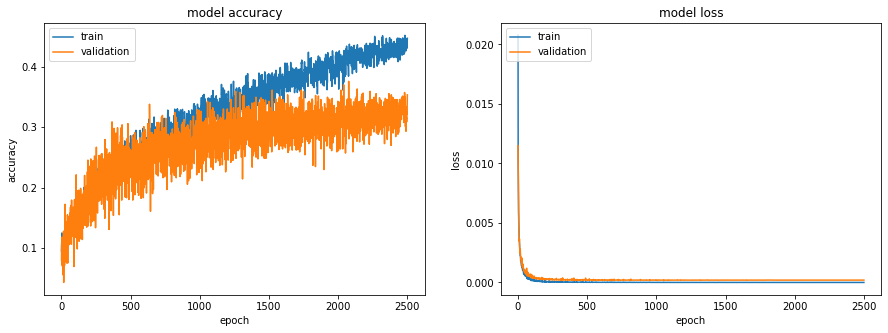

Epochs: 2500    Batch Size: 40    Optimitzer: Adamax    Init LR: 0.001    Decay Step: 10000    Decay Rate: 0.92


In [59]:
train_mse = model.evaluate(x_train, y_train, verbose=0)
test_mse = model.evaluate(x_test, y_test, verbose=0)
print('#Train Data#     Loss: %.5f' % train_mse[0] + '    Accuracy: %.2f' % (train_mse[1]*100))
print('#Test  Data#     Loss: %.5f' % test_mse[0]  + '    Accuracy: %.2f' % (test_mse[1]*100))

# Plots
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Summarize history for accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.title.set_text('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Summarize history for loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()
plt.savefig('accuracy.jpg')
plt.close()

print('Epochs: ' + str(n_epochs) + '    Batch Size: ' + str(batch_size) + '    Optimitzer: ' + str(optimizer._name)
      + '    Init LR: ' + str(init_lr) + '    Decay Step: ' + str(decay_stp) + '    Decay Rate: ' + str(decay_rt))

Store the Model

In [60]:
# Serialize model to JSON
model_json = model.to_json()
with open("E:\Documents\Projects\Python\PycharmCurrent\MLmodel.json", "w") as json_file:
    json_file.write(model_json)
tfjs.converters.save_keras_model(model, "E:\Documents\Projects\Python\PycharmCurrent\MLstuff")

Prediction test

In [ ]:
# Compute and store the result
# TODO Use the data from the webcam, by now use an animation
# input_data =  # vector of 225
result = model.predict(input_data, batch_size=batch_size)

with open("results.json", 'w') as file:
    json.dump(result.tolist(), file, indent=4)

FUTURE TASKS CODE

In [15]:
# # Save the model
# filepath = 'saved_model'
# model.save(filepath)
# 
# # Load the model
# model = load_model(filepath, compile = True)